In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
data1 = pd.read_csv("deliveries.csv")
data2 = pd.read_csv("matches.csv")

In [3]:
data1.head()
data1.columns


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
data1.shape

(150460, 21)

In [5]:
data2.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
data2.shape

(636, 18)

In [7]:
categorical_data1 = data1.dtypes[data1.dtypes == "object"].index
print(categorical_data1)


Index(['batting_team', 'bowling_team', 'batsman', 'non_striker', 'bowler',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [9]:
data1.apply(lambda x:sum(x.isnull()))

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [10]:
data1 = data1.fillna('0')


In [11]:
data1.apply(lambda x:sum(x.isnull()))

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [12]:
data2.apply(lambda x:sum(x.isnull()))

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [13]:
data2 =data2.drop('umpire3',axis =1)

In [14]:
data2['umpire1'].value_counts()

HDPK Dharmasena          73
Asad Rauf                51
AK Chaudhary             43
Aleem Dar                38
BF Bowden                37
S Ravi                   36
BR Doctrove              34
M Erasmus                32
RE Koertzen              20
S Asnani                 19
JD Cloete                16
CB Gaffaney              14
BG Jerling               13
AY Dandekar              13
NJ Llong                 12
SS Hazare                11
VA Kulkarni              11
Nitin Menon              11
A Nand Kishore           11
RK Illingworth           11
KN Ananthapadmanabhan    11
S Das                    10
MR Benson                10
K Hariharan              10
DJ Harper                 9
BNJ Oxenford              7
IL Howell                 7
GAV Baxter                7
RM Deshpande              7
C Shamshuddin             6
SJ Davis                  6
SK Tarapore               5
CK Nandan                 5
SD Fry                    5
YC Barde                  4
AM Saheba           

In [15]:
data2['umpire1'] =data2['umpire1'].fillna('HDPK Dharmasena ')

In [16]:
data2['umpire2'].value_counts()

SJA Taufel         54
C Shamshuddin      50
S Ravi             49
RJ Tucker          38
CK Nandan          36
RB Tiffin          30
VA Kulkarni        28
SK Tarapore        26
BNJ Oxenford       25
AM Saheba          23
M Erasmus          22
RE Koertzen        21
DJ Harper          18
AK Chaudhary       15
HDPK Dharmasena    14
SL Shastri         13
K Srinath          13
NJ Llong           13
K Hariharan        11
S Asnani           11
CB Gaffaney        10
VK Sharma           9
RK Illingworth      8
PR Reiffel          8
Nitin Menon         8
BR Doctrove         8
IL Howell           7
SS Hazare           6
GA Pratapkumar      6
PG Pathak           6
AL Hill             6
I Shivram           6
S Das               5
A Nand Kishore      5
TH Wijewardene      5
BG Jerling          4
AV Jayaprakash      4
A Deshmukh          3
K Srinivasan        3
SD Ranade           2
MR Benson           2
SD Fry              1
JD Cloete           1
Subroto Das         1
SJ Davis            1
Name: umpi

In [17]:
data2['umpire2']=data2['umpire2'].fillna("SJA Taufel")


In [18]:
data2['city'].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Port Elizabeth     7
Cuttack            7
Ranchi             7
Abu Dhabi          7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
East London        3
Kimberley          3
Nagpur             3
Bloemfontein       2
Name: city, dtype: int64

In [19]:
data2['city']=data2['city'].fillna("Mumbai")

In [20]:
data1['match_id']

0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
         ... 
150430    636
150431    636
150432    636
150433    636
150434    636
150435    636
150436    636
150437    636
150438    636
150439    636
150440    636
150441    636
150442    636
150443    636
150444    636
150445    636
150446    636
150447    636
150448    636
150449    636
150450    636
150451    636
150452    636
150453    636
150454    636
150455    636
150456    636
150457    636
150458    636
150459    636
Name: match_id, Length: 150460, dtype: int64

In [21]:
data2['season'].value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

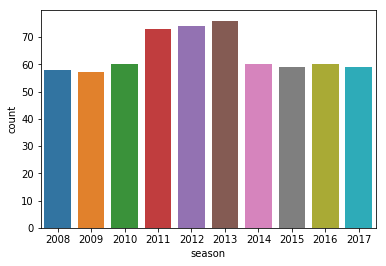

In [22]:
sns.countplot(x=data2['season'], data=data2)


In [23]:
data2['city'].value_counts()

Mumbai            92
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Port Elizabeth     7
Cuttack            7
Ranchi             7
Abu Dhabi          7
Raipur             6
Sharjah            6
Kochi              5
Indore             5
Kanpur             4
East London        3
Kimberley          3
Nagpur             3
Bloemfontein       2
Name: city, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

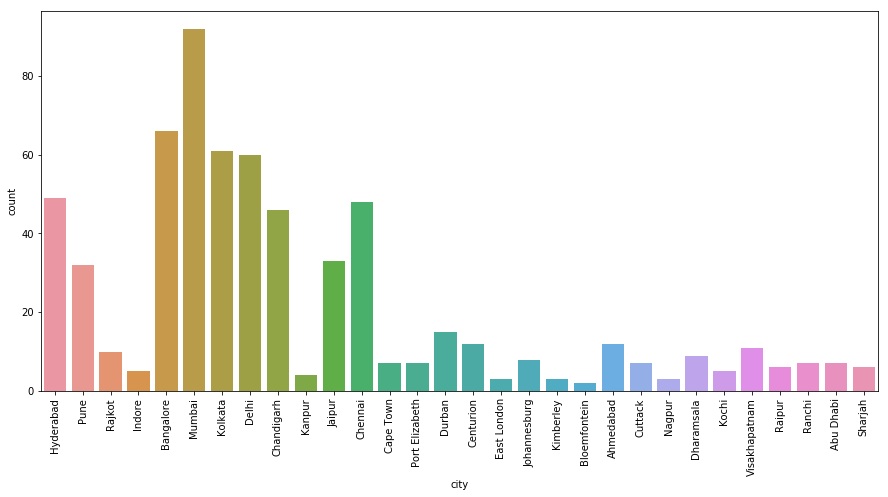

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(x=data2['city'], data=data2)
plt.xticks(rotation = 'vertical')

In [25]:
data2['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

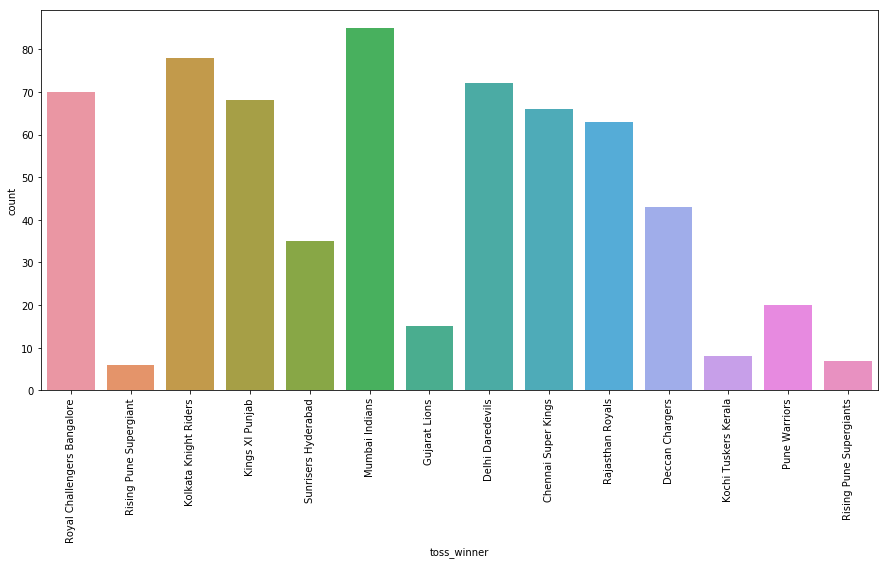

In [26]:

plt.figure(figsize=(15,7))
sns.countplot(x=data2['toss_winner'], data=data2)
plt.xticks(rotation = 'vertical')                  

In [27]:
data2['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

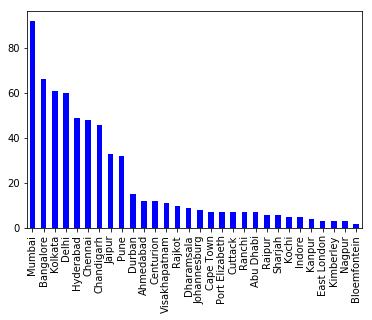

In [28]:
data2['city'].value_counts().plot(kind='bar', color='blue')

In [29]:
data2['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [30]:
data2['winner'].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

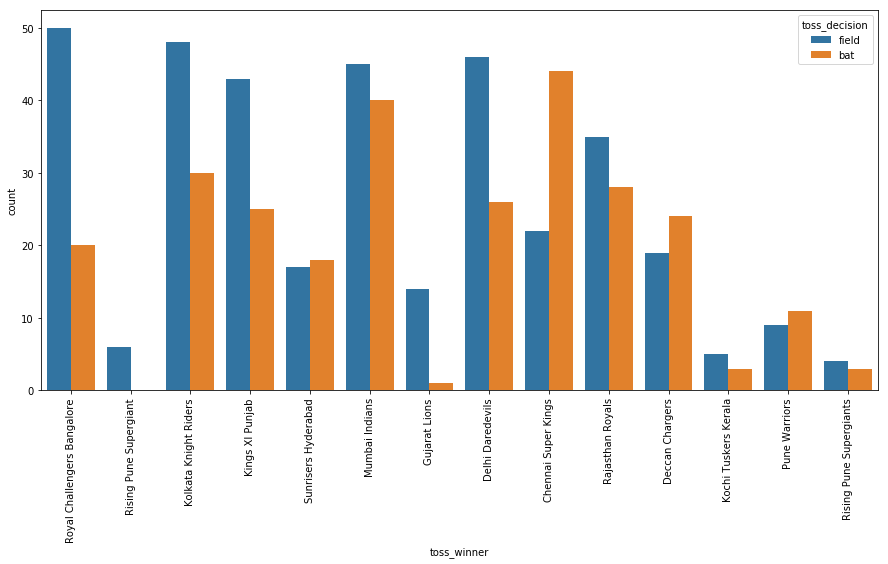

In [31]:

plt.figure(figsize=(15,7))
sns.countplot(x=data2['toss_winner'],hue=data2['toss_decision'],data=data2)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

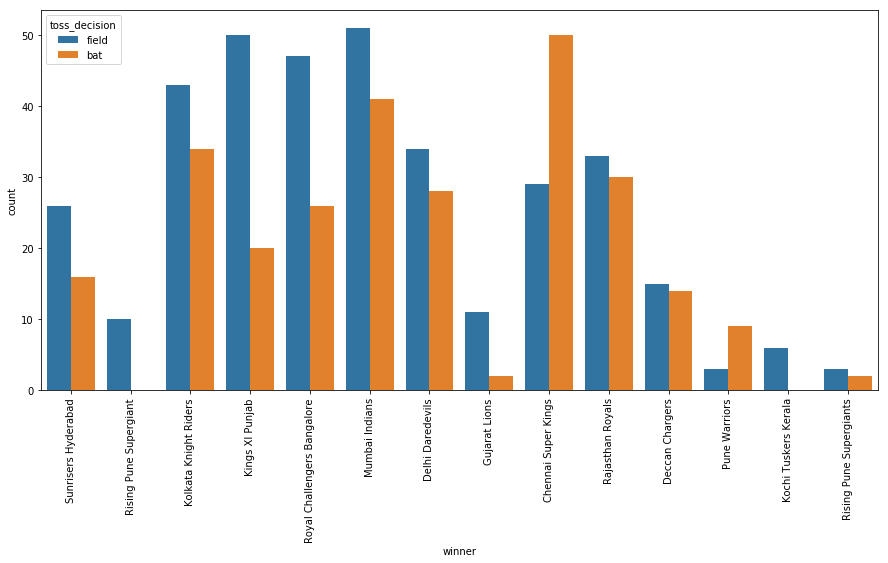

In [32]:
plt.figure(figsize=(15,7))
sns.countplot(x=data2['winner'],hue=data2['toss_decision'],data=data2)
plt.xticks(rotation='vertical')

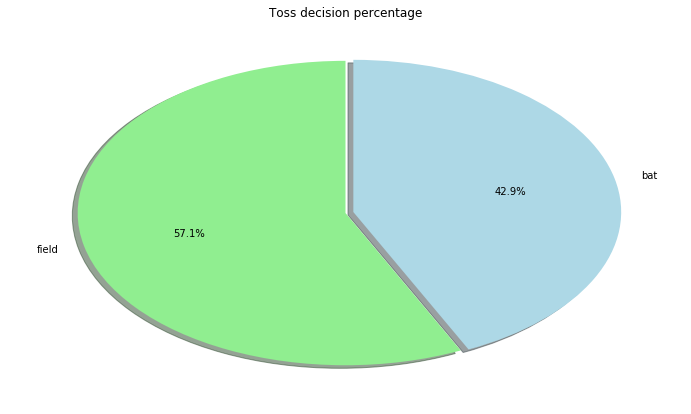

In [33]:

plt.figure(figsize=(12,7))
temp=data2['toss_decision'].value_counts()
sizes = (np.array((temp / temp.sum())*100))
plt.pie(sizes, labels=(np.array(temp.index)),colors=['lightgreen', 'lightblue'],
        autopct='%1.1f%%',shadow=True, startangle=90,explode=(0,0.03))
plt.title("Toss decision percentage")
plt.show()
          

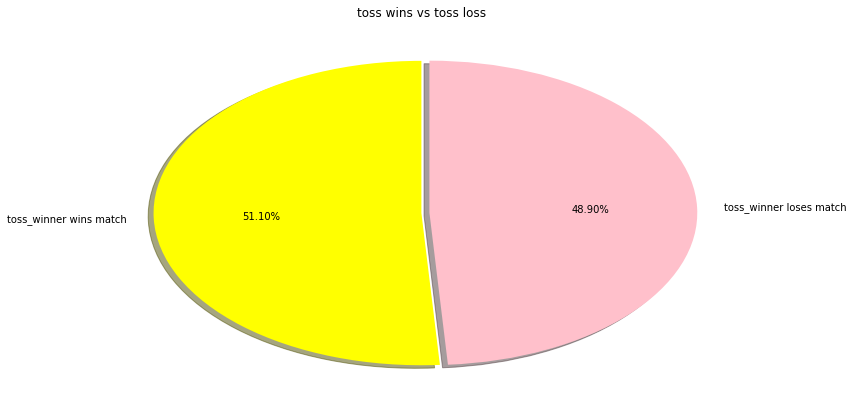

In [34]:
plt.figure(figsize=(12,7))
temp=data2[data2['toss_winner']==data2['winner']]
sizes = (len(temp),(data2.shape[0]-len(temp)))
labels = ['toss_winner wins match','toss_winner loses match']
plt.pie(sizes, labels=labels,colors=['yellow', 'pink'],
        autopct='%1.2f%%',shadow=True, startangle=90,explode=(0,0.03))
plt.title("toss wins vs toss loss")
plt.show()


C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


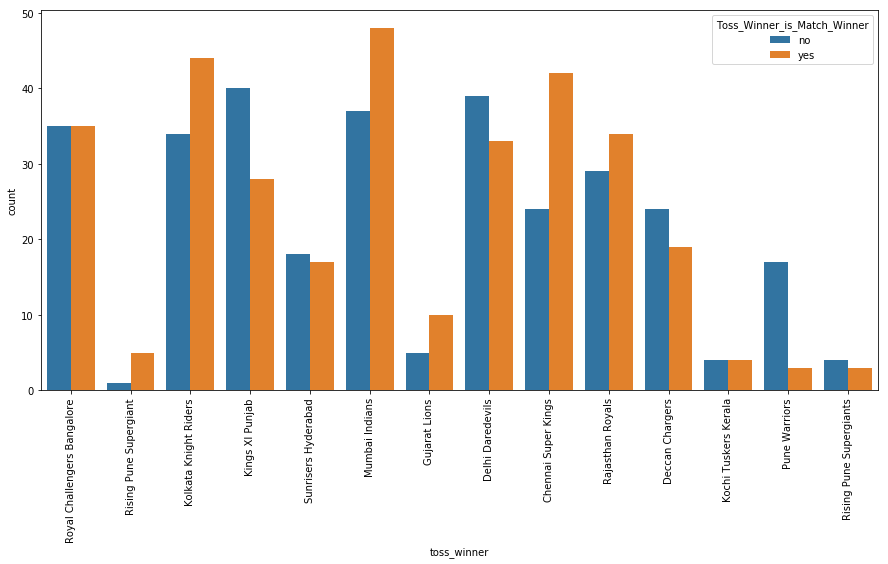

In [35]:
temp1 = data2
temp1['Toss_Winner_is_Match_Winner'] = 'no'
temp1['Toss_Winner_is_Match_Winner'].loc[data2['toss_winner']==data2['winner']] = 'yes'
plt.figure(figsize=(15,7))
sns.countplot(x='toss_winner', hue='Toss_Winner_is_Match_Winner', data=temp1)
plt.xticks(rotation='vertical')
plt.show()

In [36]:
temp1['Toss_Winner_is_Match_Winner'].value_counts()

yes    325
no     311
Name: Toss_Winner_is_Match_Winner, dtype: int64

In [37]:
bowlers = data2[['id','season']].merge(data1, right_on='match_id',left_on='id',how='left').drop('id',axis=1)
bowlers.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,0,0,0
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,0,0,0
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,0,0,0
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,0,0,0
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,0,0,0


In [38]:
bowlers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150460 entries, 0 to 150459
Data columns (total 22 columns):
season              150460 non-null int64
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    150460 non-null object
dismissal_kind      150460 non-null object


In [39]:
total_wickets = bowlers[bowlers.dismissal_kind !='0']
total_wickets['dismissal_kind'].value_counts()

caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
hit wicket                  9
retired hurt                9
obstructing the field       1
Name: dismissal_kind, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

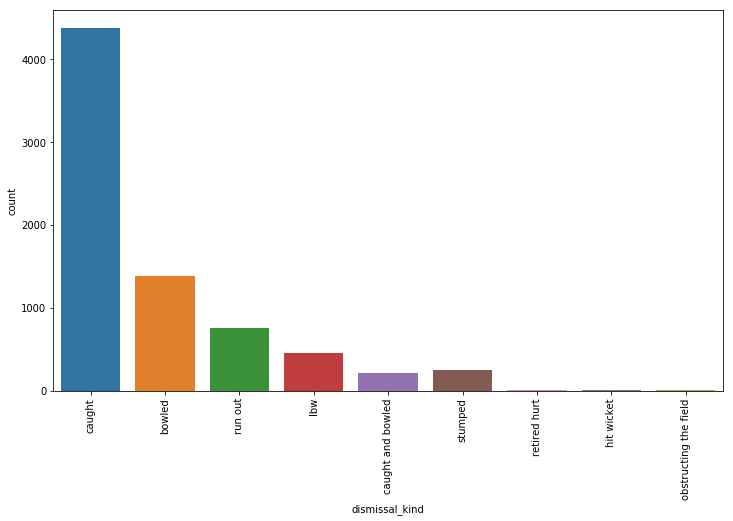

In [40]:

plt.figure(figsize=(12,7))
sns.countplot(x=total_wickets['dismissal_kind'],data=total_wickets)
plt.xticks(rotation='vertical')

In [41]:
matches_played_byteams=pd.concat([data2['team1'],data2['team2']])


In [42]:
matches_played_byteams.head()

0            Sunrisers Hyderabad
1                 Mumbai Indians
2                  Gujarat Lions
3         Rising Pune Supergiant
4    Royal Challengers Bangalore
dtype: object

In [43]:
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=data2['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)

In [44]:
trace1 = plt.Bar(x=matches_played_byteams.index,
                y=matches_played_byteams['Total Matches'],
                name='Total Matches')

trace2 = plt.Bar(x=matches_played_byteams.index,
                y=matches_played_byteams['wins'],
                name='Matches Won')

data = [trace1, trace2]
layout = plt.Layout(barmode='stack')

AttributeError: module 'matplotlib.pyplot' has no attribute 'Bar'

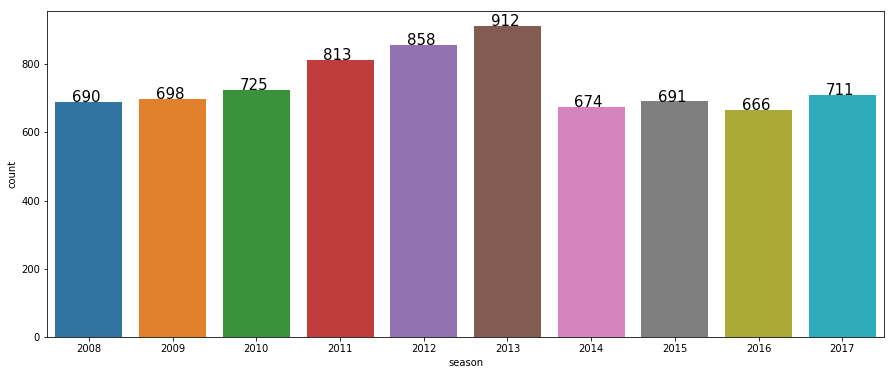

In [45]:
plt.figure(figsize=(15,6))
temp = sns.countplot(x='season',data=total_wickets)
for i in temp.patches:
    temp.annotate(format(i.get_height()),(i.get_x()+.20, i.get_height()),fontsize=15)

In [46]:
total_wickets['bowler'].value_counts()


SL Malinga           170
A Mishra             142
DJ Bravo             137
Harbhajan Singh      136
PP Chawla            133
R Vinay Kumar        125
A Nehra              121
Z Khan               119
B Kumar              117
R Ashwin             110
SP Narine            109
UT Yadav             107
P Kumar              102
SR Watson            100
RP Singh             100
DW Steyn             100
IK Pathan             99
PP Ojha               99
JA Morkel             96
MM Sharma             91
RA Jadeja             89
M Morkel              88
L Balaji              85
MM Patel              82
R Bhatia              82
AB Dinda              82
DS Kulkarni           81
JP Faulkner           76
Sandeep Sharma        76
JH Kallis             74
                    ... 
S Vidyut               1
LMP Simmons            1
NB Singh               1
AC Gilchrist           1
FY Fazal               1
AM Rahane              1
GS Sandhu              1
LA Carseldine          1
PM Sarvesh Kumar       1


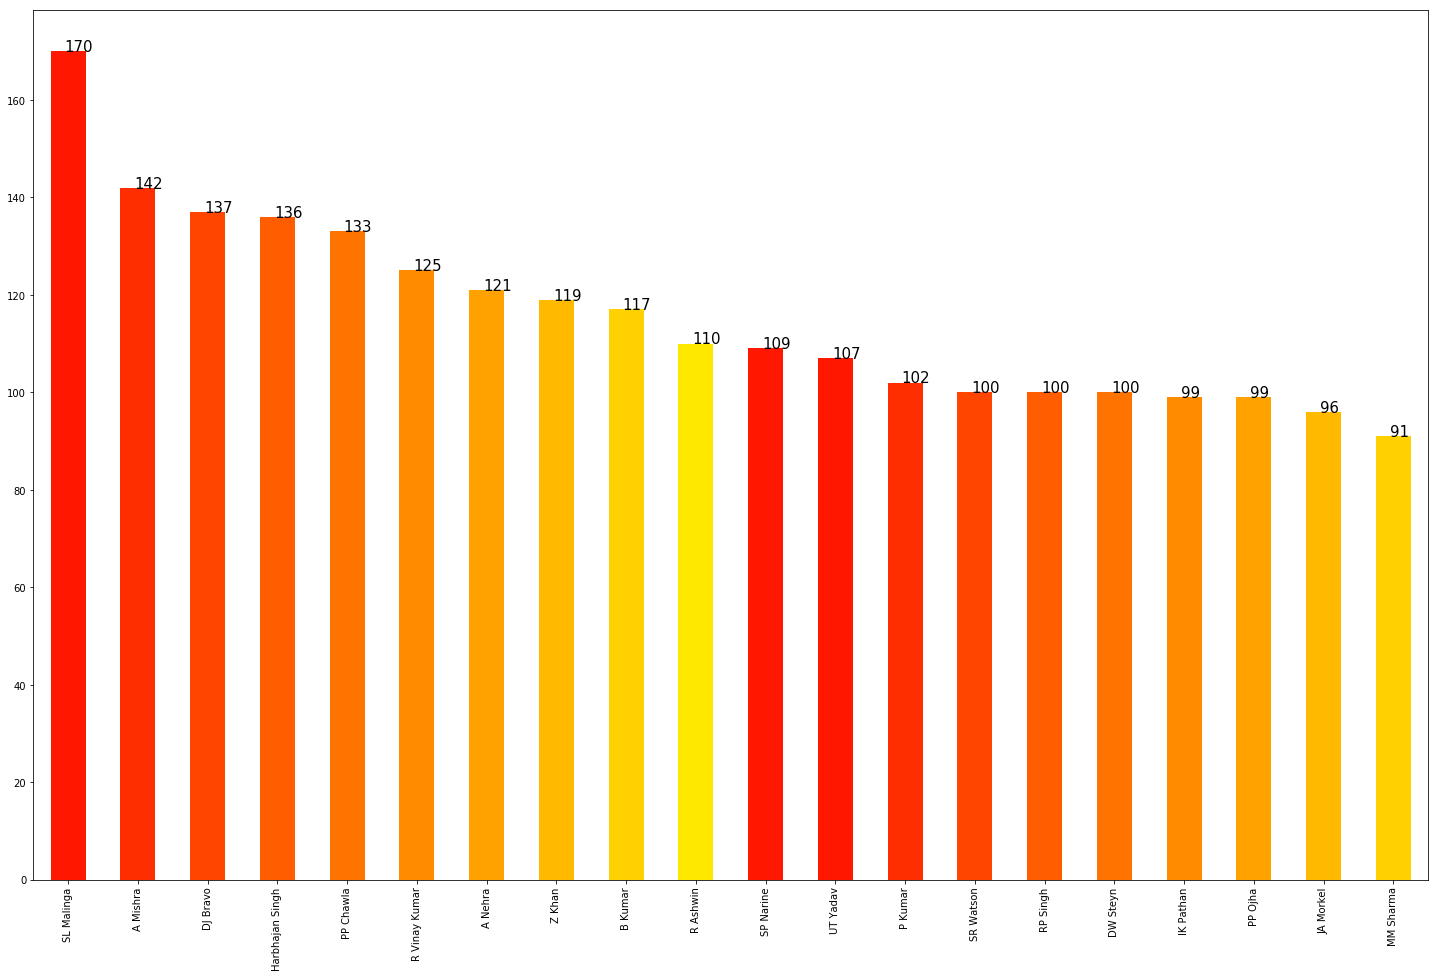

In [47]:
plt.figure(figsize=(25,16))
temp = total_wickets['bowler'].value_counts()[:20].plot(kind='bar', color=sns.color_palette('autumn',10))
for i in temp.patches:
    temp.annotate(format(i.get_height()),(i.get_x()+.20, i.get_height()),fontsize=15)

In [48]:
batsmen = data2[['id','season']].merge(data1, right_on='match_id',left_on='id',how='left').drop('id',axis=1)
batsmen.head()

,season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,0,0,0
1,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,0,0,0
2,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,0,0,0
3,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,0,0,0
4,2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,0,0,0


In [65]:
temp = batsmen.groupby('batsman')['batsman_runs'].sum().reset_index()
temp = temp.sort_values('batsman_runs', ascending=False)[:10]
temp.reset_index(drop=True)

,batsman,batsman_runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014
5,RV Uthappa,3778
6,CH Gayle,3651
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3486


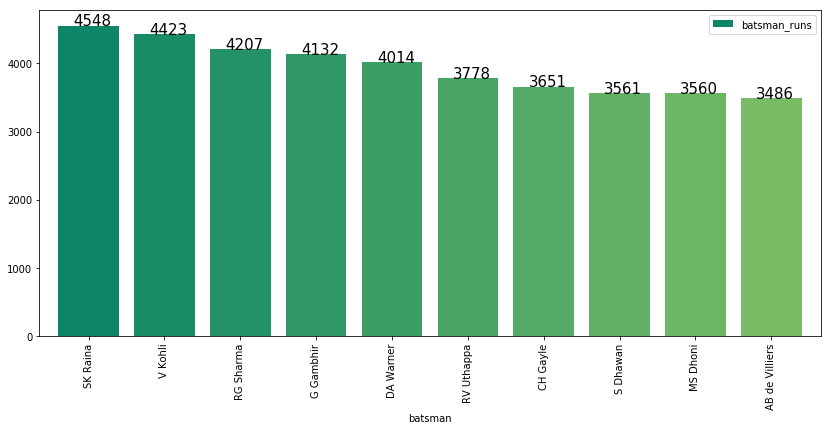

In [66]:
temp = temp.plot(kind='bar', x='batsman', y='batsman_runs', width=0.8, color=sns.color_palette('summer',20))
for i in temp.patches:
    temp.annotate(format(i.get_height()),(i.get_x()+0.20, i.get_height()),fontsize=15)

fig=plt.gcf()
fig.set_size_inches(14,6)
plt.show()

In [67]:
total_wickets.columns

Index(['season', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [78]:
temp = batsmen.groupby('season')['total_runs'].sum()
temp.head()

season
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
Name: total_runs, dtype: int64

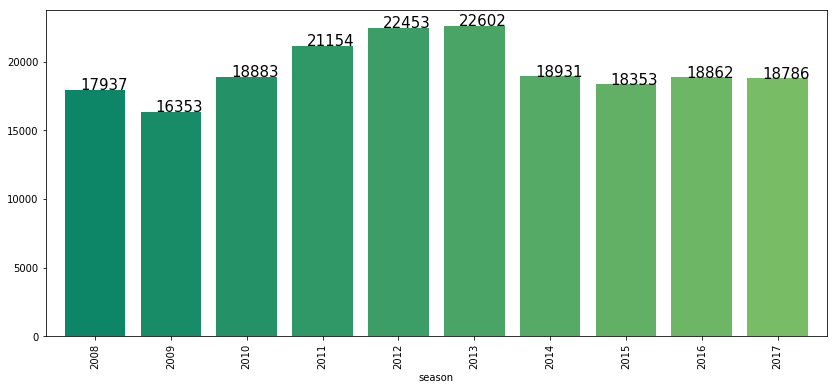

In [79]:
temp = temp.plot(kind='bar', x='season', y='total_runs', width=0.8, color=sns.color_palette('summer',20))
for i in temp.patches:
    temp.annotate(format(i.get_height()),(i.get_x()+0.20, i.get_height()),fontsize=15)

fig=plt.gcf()
fig.set_size_inches(14,6)
plt.show()

In [83]:
boundary = ['4']
fours = batsmen[batsmen['batsman_runs'].isin(boundary)]
fours['batsman'].value_counts()[:10]

G Gambhir     484
SK Raina      402
DA Warner     401
S Dhawan      401
V Kohli       384
RV Uthappa    377
RG Sharma     354
V Sehwag      334
AM Rahane     320
PA Patel      297
Name: batsman, dtype: int64

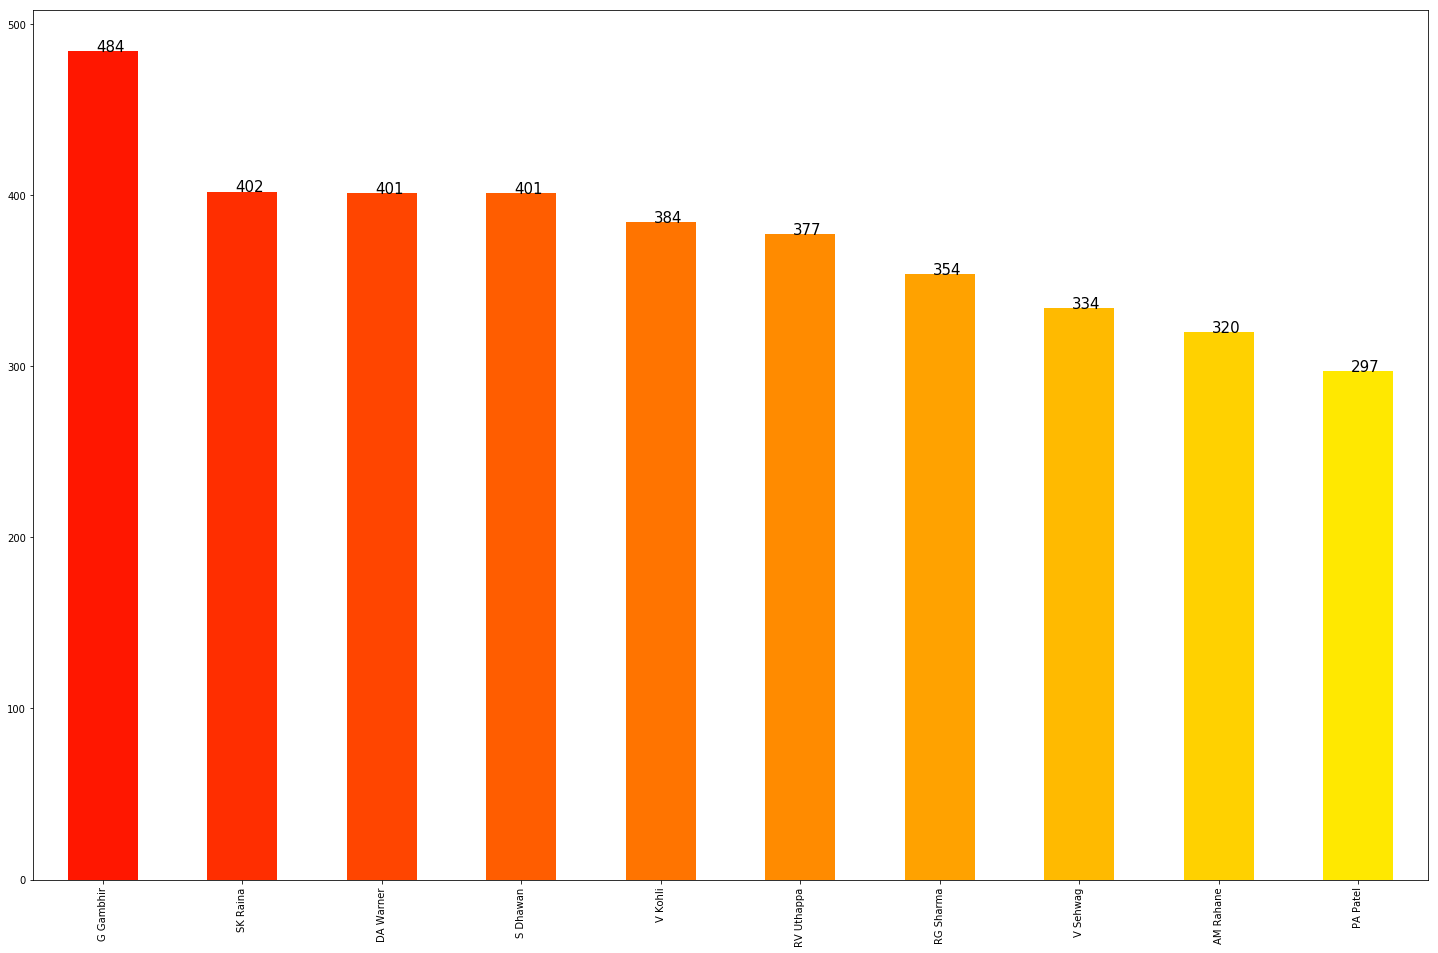

In [91]:
plt.figure(figsize=(25,16))
temp = fours['batsman'].value_counts()[:10].plot(kind='bar', color=sns.color_palette('autumn',10))
for i in temp.patches:
    temp.annotate(format(i.get_height()),(i.get_x()+.20, i.get_height()),fontsize=15)

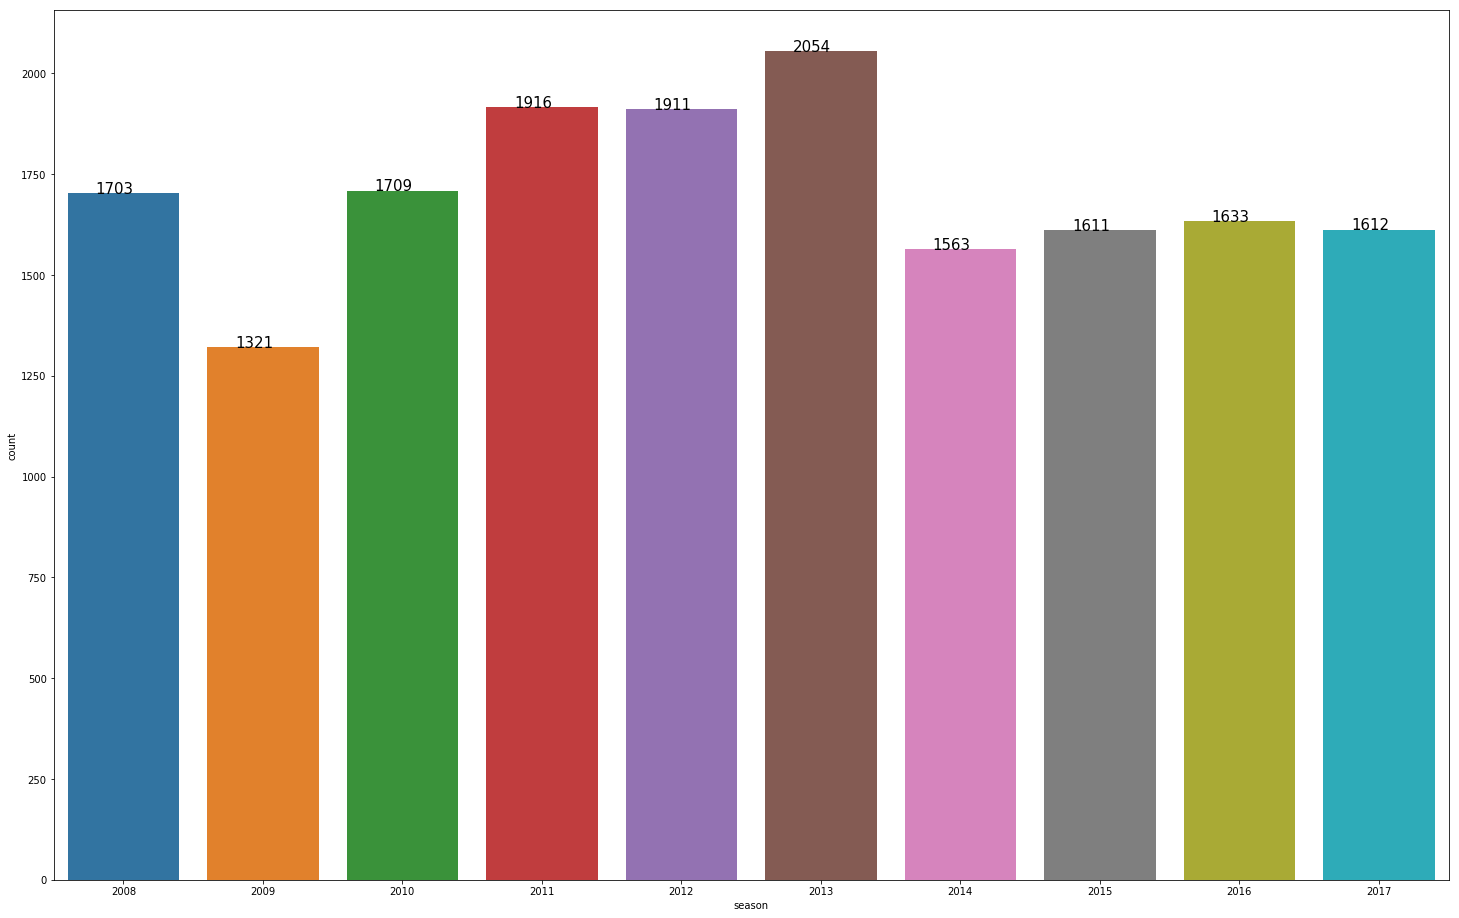

In [93]:
plt.figure(figsize=(25,16))
temp=sns.countplot(x=fours['season'],data=fours)
for i in temp.patches:
    temp.annotate(format(i.get_height()),(i.get_x()+.20, i.get_height()),fontsize=15)
   

In [95]:
boundary = ['6']
sixes = batsmen[batsmen['batsman_runs'].isin(boundary)]
sixes['batsman'].value_counts()[:10]

CH Gayle          266
SK Raina          174
RG Sharma         173
V Kohli           160
DA Warner         160
AB de Villiers    158
MS Dhoni          156
YK Pathan         149
KA Pollard        148
Yuvraj Singh      141
Name: batsman, dtype: int64

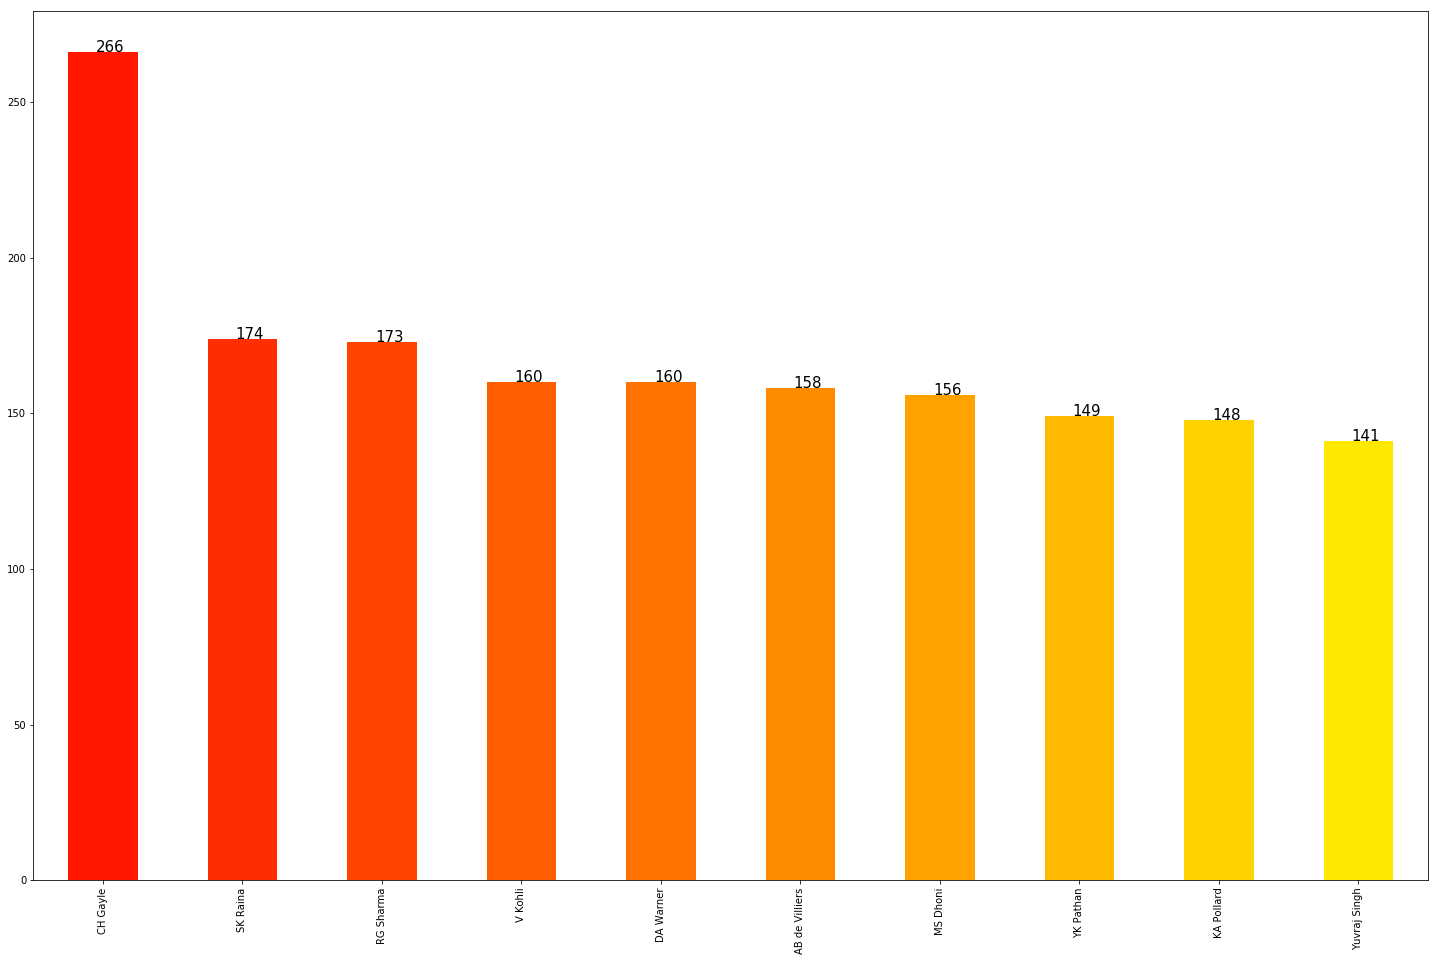

In [96]:
plt.figure(figsize=(25,16))
temp = sixes['batsman'].value_counts()[:10].plot(kind='bar', color=sns.color_palette('autumn',10))
for i in temp.patches:
    temp.annotate(format(i.get_height()),(i.get_x()+.20, i.get_height()),fontsize=15)

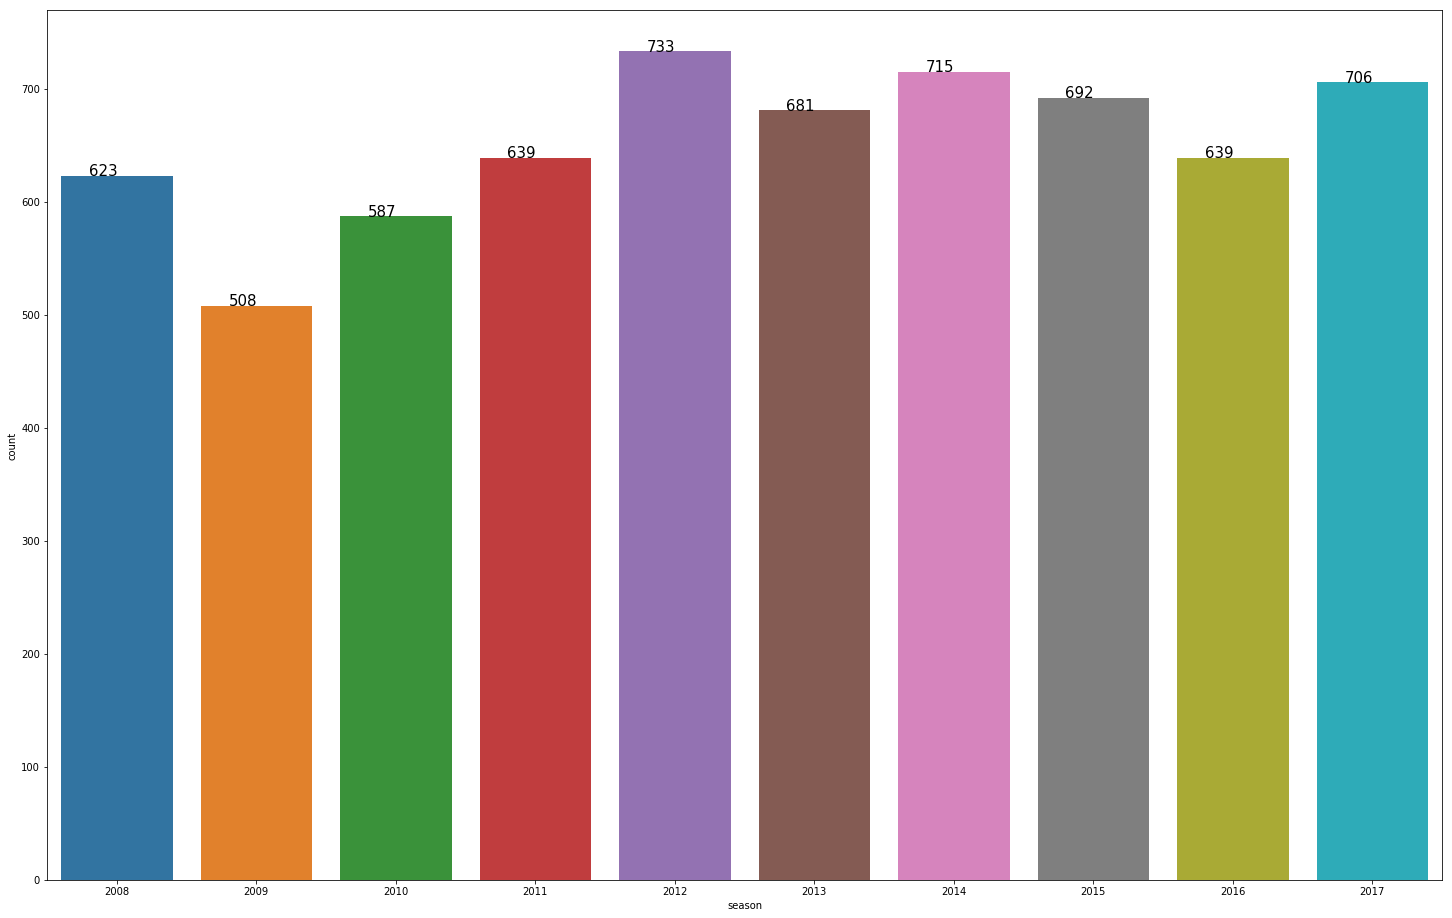

In [97]:
plt.figure(figsize=(25,16))
temp=sns.countplot(x=sixes['season'],data=sixes)
for i in temp.patches:
    temp.annotate(format(i.get_height()),(i.get_x()+.20, i.get_height()),fontsize=15)
   

In [101]:
a=sixes.groupby("season")["batsman_runs"].agg(lambda four : four.sum()).reset_index()

b=fours.groupby("season")["batsman_runs"].agg(lambda six: six.sum()).reset_index()

boundaries=a.merge(b,left_on='season',right_on='season',how='left')


In [99]:
boundaries.head()

,season,batsman_runs_x,batsman_runs_y
0,2008,3738,6812
1,2009,3048,5284
2,2010,3522,6836
3,2011,3834,7664
4,2012,4398,7644


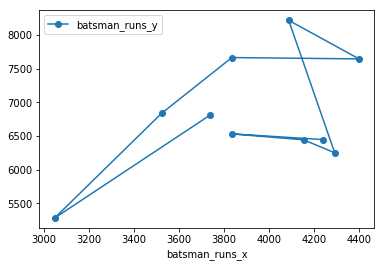

In [102]:
boundaries.plot(x='batsman_runs_x', y='batsman_runs_y', marker='o')

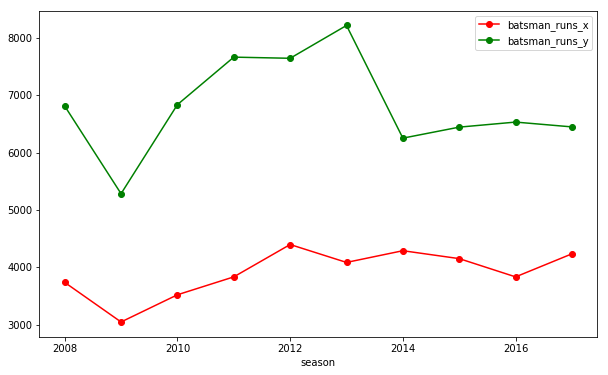

In [103]:
boundaries.set_index('season')[['batsman_runs_x','batsman_runs_y']].plot(marker='o',color=['red','green'])
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()
